## Plotting the Charts (index.html)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [24]:
file = os.path.join('cases', 'all.ipynb')
%run '{file}'

### Confirmed Cases (Line Chart)

In [18]:
color_index = ['crimson','coral','goldenrod','green','teal','navy','grey','purple']

In [19]:
def linechart_global(df, output_file):

    # x-axis
    dates = df.columns.tolist()
    days = range(len(dates))

    # y-axis
    countries = df.index
    top_confirmed = df.values.tolist()

    fig, ax = plt.subplots(figsize = (9,6))

    # plt.title("COVID-19 Confirmed Cases")
    
    plt.xlabel("Day", fontsize=14)
    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(0, 84)
    plt.yticks(np.arange(0, 500000, step=50000))
    plt.ylim(0, 500000)

    counter = 0
    country_labels = ()

    ax.tick_params(axis='both', labelsize=14)

    for country in countries:
        ax.plot(days, top_confirmed[counter], label=countries, color=color_index[counter], linestyle='-')
        ax.fill_between(days, 0, top_confirmed[counter], color=color_index[counter], alpha=0.6)

        country_labels += (country,)
        counter += 1

        if counter == len(countries):
            break

    plt.legend(country_labels, loc='best')            
    plt.grid(axis='y')
    plt.savefig(output_file)
    plt.tight_layout()
    plt.show()

#### Global

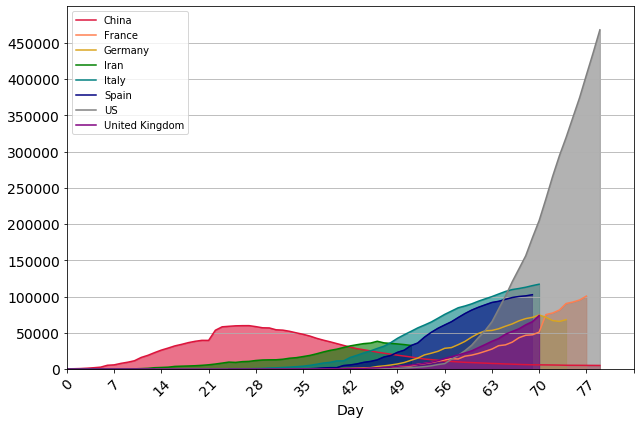

In [20]:
saved_img = os.path.join('..', 'images','confirmed_global.png')

# linechart_global(first_confirmed_df, saved_img)
linechart_global(first_infected_df, saved_img)

#### By Country

In [94]:
def linechart_one(country_name):

    # x-axis
    dates = top_confirmed_df.columns.tolist()
    days = range(len(dates))

    # y-axis
    confirmed = top_confirmed_df.loc[top_confirmed_df.index == country_name].values[0]
    recovered = top_recovered_df.loc[top_recovered_df.index == country_name].values[0]
    fatalities = top_fatalities_df.loc[top_fatalities_df.index == country_name].values[0]
    
    fig, ax = plt.subplots(figsize = (9,6))

    # plt.title("COVID-19 All Cases")
    plt.xlabel("Day", fontsize=14)
    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(1, 80)
    # plt.yticks(np.arange(0, 500000, step=50000))
    plt.ylim(0, confirmed.max()+5000)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_axisbelow(True)
    plt.grid(axis='y', alpha=0.3)

    # Line plots
    ax.plot(days, confirmed, label='Confirmed', color='tomato', linestyle='-')
    ax.fill_between(days, recovered+fatalities, confirmed, color='tomato', alpha=0.7)
    
    ax.plot(days, recovered+fatalities, label='Recovered', color='teal', linestyle='-')
    ax.fill_between(days, fatalities, recovered+fatalities, color='teal', alpha=0.7)
    
    ax.plot(days, fatalities, label='Fatalities', color='navy', linestyle='-')
    ax.fill_between(days, 0, fatalities, color='navy', alpha=0.7)

    # Save image
    country_name = country_name.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'confirmed_{country_name}.png')
    plt.savefig(saved_img)

    plt.tight_layout()
    plt.show()

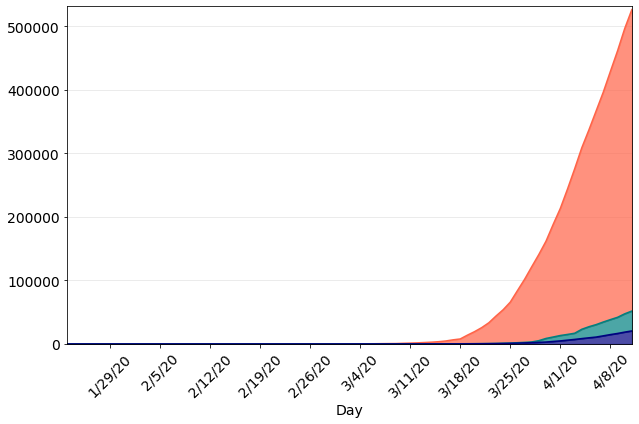

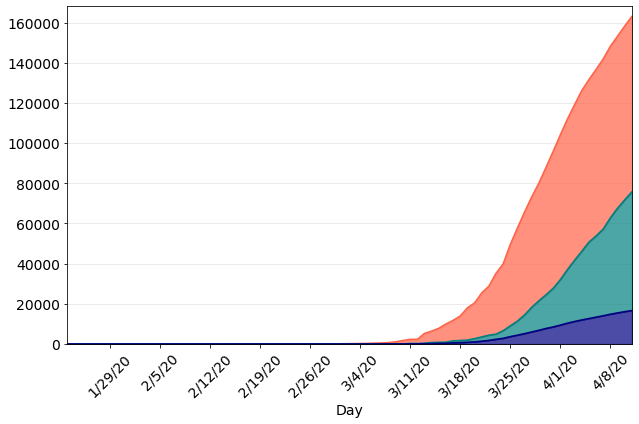

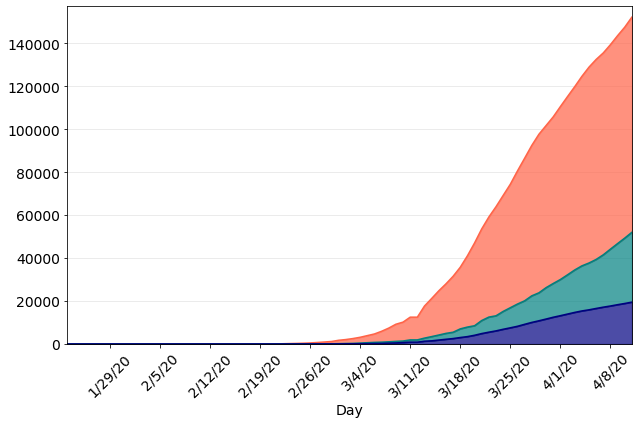

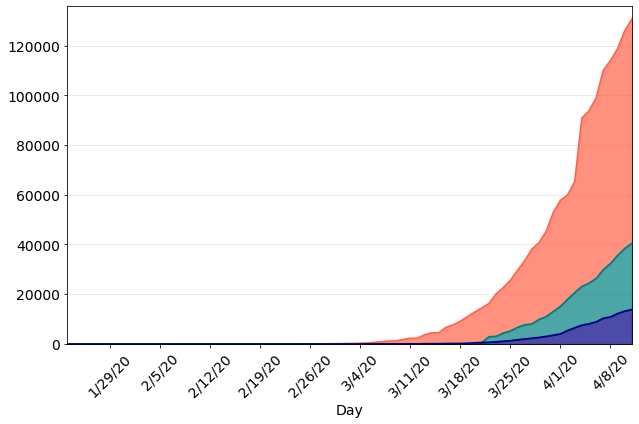

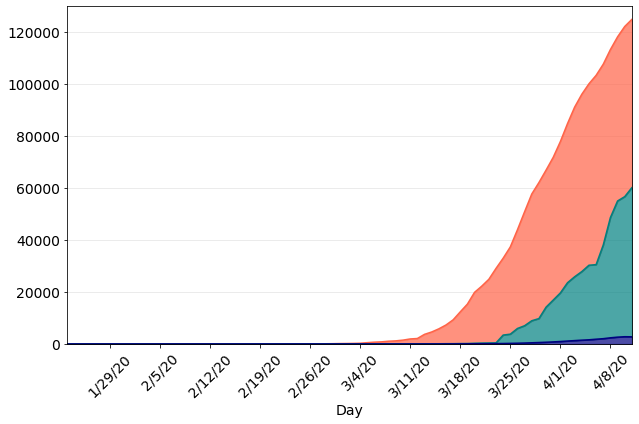

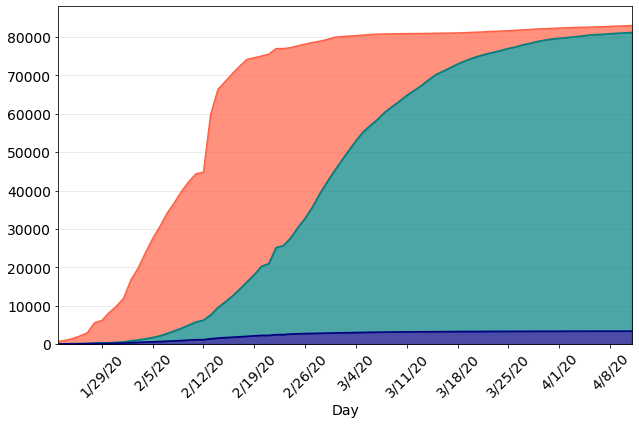

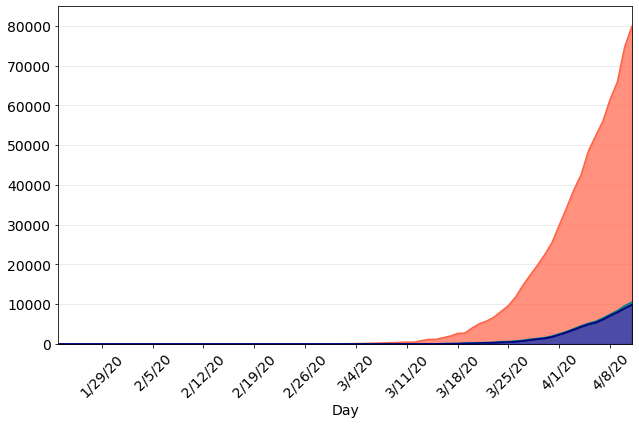

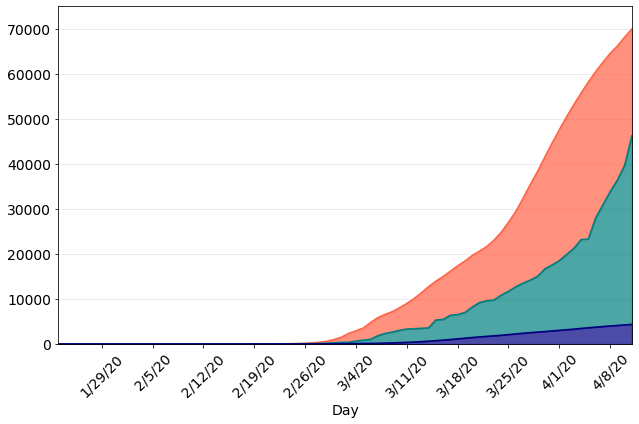

In [95]:
for i in range(len(top_confirmed_df)):
    country = top_confirmed_df.index[i]
    linechart_one(country)

### Confirmed Cases vs Fatalities (Bar Chart)

#### Global

In [22]:
def barchart_one(country, c_df, f_df):

    # x-axis
    dates = c_df.columns.tolist()
    days = range(len(dates))

    # y-axis
    confirmed = c_df.loc[c_df.index == country]
    fatalities = f_df.loc[f_df.index == country]
    y1 = confirmed.iloc[0,:]
    y2 = fatalities.iloc[0,:]

    fig, ax = plt.subplots(figsize = (9,6))

    bar_width = 1
    rects1 = ax.bar(days, y1, bar_width, color='royalblue')
    rects2 = ax.bar(days, y2, bar_width, color='seagreen')

    plt.title(country, fontsize=14)
    plt.xlabel('Day', fontsize=14)
    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(0, 84)
    plt.yticks(np.arange(0, 500000, step=50000))
    plt.ylim(0, 500000)
    ax.tick_params(axis='both', labelsize=14)

    ax.legend( (rects1[0], rects2[0]), ('Confirmed', 'Fatalities') )
    plt.grid(axis='y')

    country_name = country.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'cvf_{country_name}.png')
    plt.savefig(saved_img)

    plt.tight_layout()
    plt.show()

#### By Country

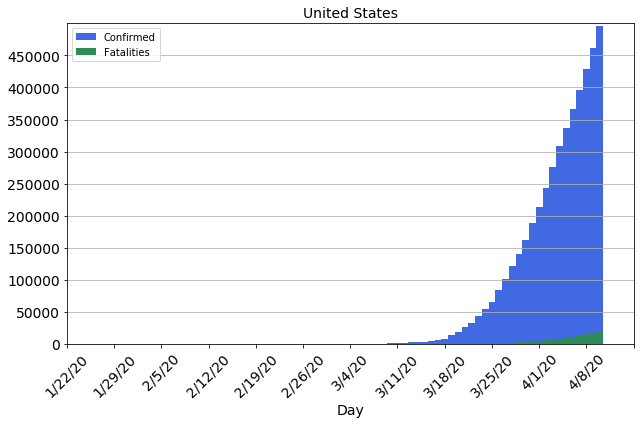

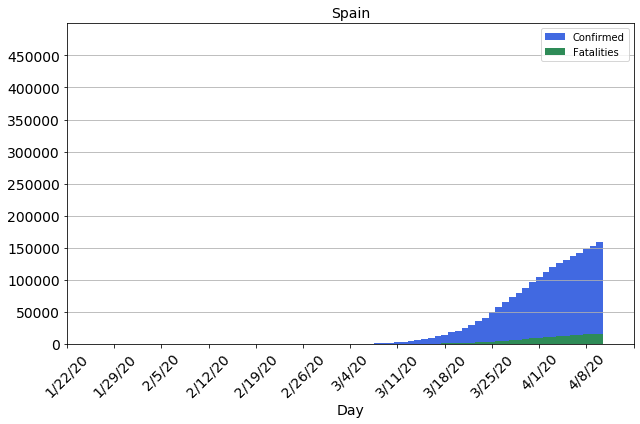

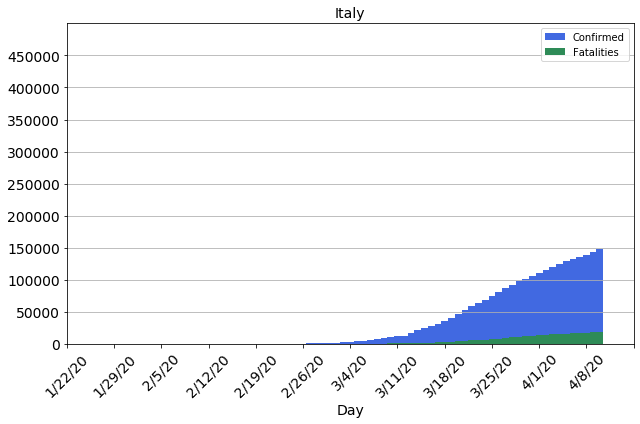

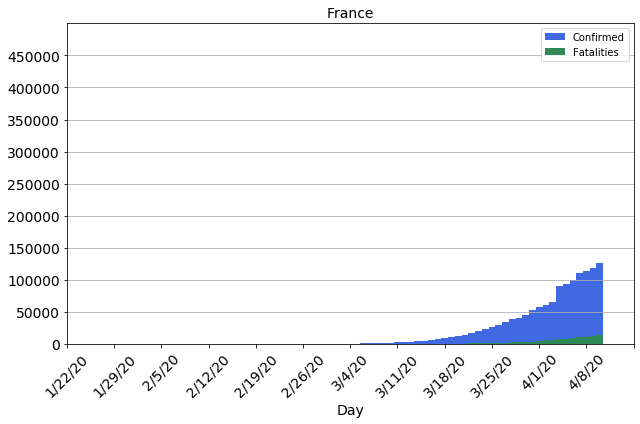

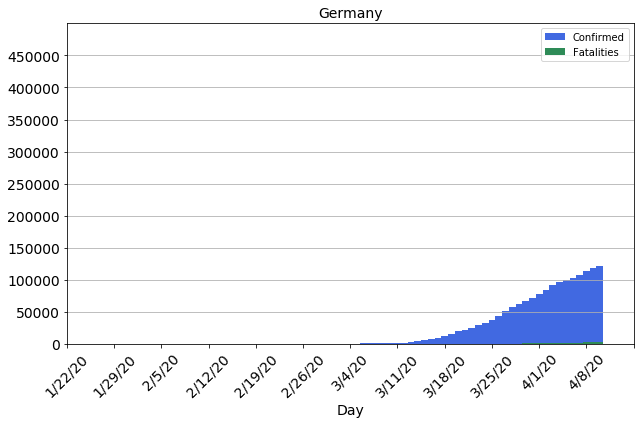

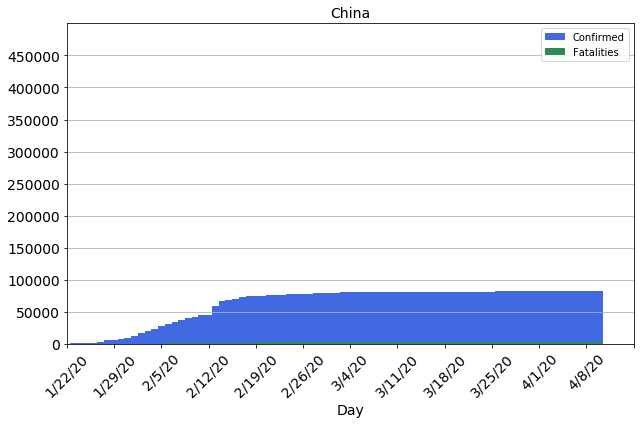

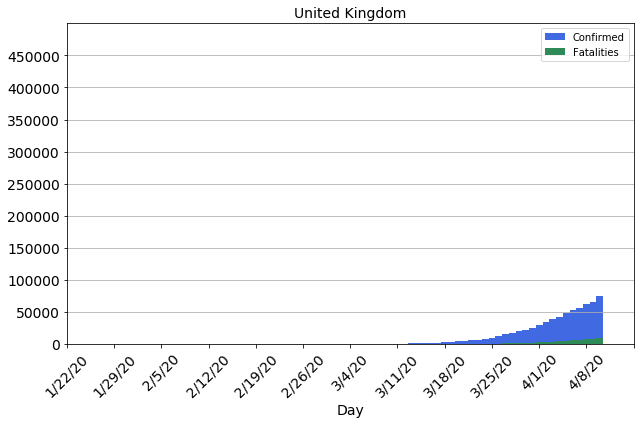

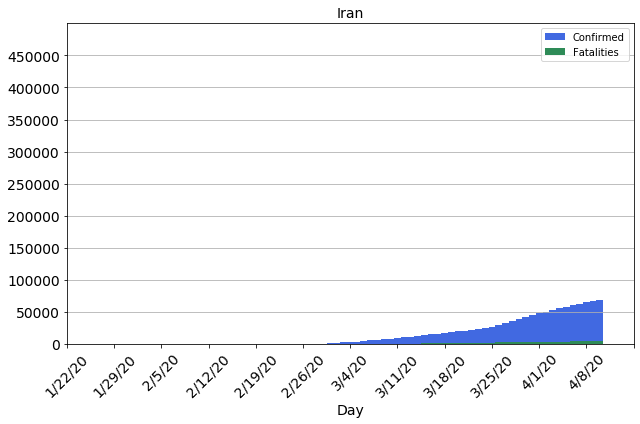

In [23]:
for i in range(len(top_confirmed_df)):
    country = top_confirmed_df.index[i]    
    barchart_one(country, top_confirmed_df, top_fatalities_df)
    
    country_name = country.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'cvf_{country_name}.png')